Some short calculations to show that a source at $z_s = \infty$ does **not** mean that
$D_{ds}/D_s$ equals one.

In [1]:
%matplotlib inline
import grale.cosmology as cosmology
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

We'll use a flat cosmology, with $\Omega_m = 0.3$ and $\Omega_v = 0.7$ for illustration.

In [2]:
Wm = 0.3
Wv = (1-Wm)

The angular diameter distance is given by

$$D_{\rm ang}(z_d, z_s) = \frac{d_H}{1+z_s} \int_{z_d}^{z_s} \frac{dz}{E(z)}$$

where

$$E(z) = \sqrt{\Omega_m (1+z)^3 + \Omega_v}$$

From this, it's easy to see that

$$\frac{D_{ds}}{D_s} = \frac{D_{\rm ang}(z_d, z_s)}{D_{\rm ang}(0, z_s)} = 1 - \frac{\int_0^{z_d} \frac{dz}{E(z)}}{\int_0^{z_s}\frac{dz}{E(z)}} $$

In [3]:
Einv = lambda z : 1/(Wm*(1+z)**3 + Wv)**0.5

For a given lens, $z_d$ is fixed, so the numerator is a fixed number as well.

The integrand in the denominator looks as follows:

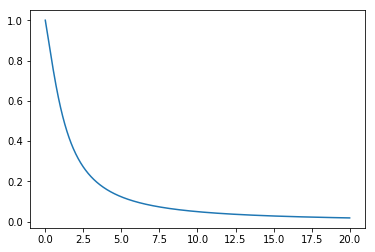

In [4]:
zs = np.linspace(0, 20, 1000)
Einvs = [ Einv(z) for z in zs ]

plt.plot(zs, Einvs);

and for any upper limit $z_s$, the integral of this will be a finite number. This then means that $D_{ds}/D_s$ 
will never become simply 1.

To further illustrate, let's calculate $D_{ds}/D_s$ using the angular diameter function
in <span style="font-variant:small-caps;">Grale</span>, as well as using the formula with the integrals.

In [5]:
cosm = cosmology.Cosmology(0.7, Wm, 0, Wv)

def Dfrac(zd, zs):
    return cosm.getAngularDiameterDistance(zd, zs)/cosm.getAngularDiameterDistance(zs)

def Dfrac2(zd, zs):
    return 1 - quad(Einv, 0, zd)[0]/quad(Einv, 0, zs)[0]

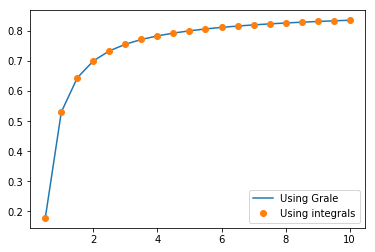

In [6]:
zd = 0.4
zs = np.linspace(0.5,10, 20)

f = [ Dfrac(zd, z) for z in zs ]
f2 = [ Dfrac2(zd, z) for z in zs ]

plt.plot(zs, f, label="Using Grale");
plt.plot(zs, f2, 'o', label="Using integrals");
plt.legend()

Apart from both results being the same (as they should), this also hints at the fact that this
fraction will never become one.

In fact, for a source at infinity, the fraction becomes:

In [7]:
Dfrac2(zd, np.inf)

0.8903873645532743